In [1]:
# fast f1 only usable in python 3.8 and 3.9
!python --version

Python 3.9.12


In [2]:
%pip install fastf1

In [3]:
import fastf1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

# Setup plotting
plotting.setup_mpl()

# Enable the cache
fastf1.Cache.enable_cache('cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

In [4]:
# add quali session
quali = fastf1.get_session(2022, 'Hungaroring', 'Q')
quali.load(laps=True, telemetry=True, weather=True)

# load 4 fastest quali time
rus = quali.laps.pick_driver('RUS').pick_fastest()
sai = quali.laps.pick_driver('SAI').pick_fastest()
nor = quali.laps.pick_driver('NOR').pick_fastest()

core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '55', '16', '4', '31', '14', '44', '77', '3', '1', '11', '24', '20', '18', '47', '22', '23', '5', '10', '6']


In [5]:
rus_car_data = rus.get_car_data().add_distance()
rus_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-07-30 14:59:15.964,11124,264,7,100,False,12,car,0 days 00:00:00.141000,0 days 01:13:50.224000,10.340000
1,2022-07-30 14:59:16.244,11313,270,7,100,False,12,car,0 days 00:00:00.421000,0 days 01:13:50.504000,31.340000
2,2022-07-30 14:59:16.604,11435,274,7,100,False,12,car,0 days 00:00:00.781000,0 days 01:13:50.864000,58.740000
3,2022-07-30 14:59:16.804,11548,277,7,100,False,12,car,0 days 00:00:00.981000,0 days 01:13:51.064000,74.128889
4,2022-07-30 14:59:17.004,10556,277,7,100,False,12,car,0 days 00:00:01.181000,0 days 01:13:51.264000,89.517778
...,...,...,...,...,...,...,...,...,...,...,...
278,2022-07-30 15:00:31.845,11284,235,6,100,False,12,car,0 days 00:01:16.022000,0 days 01:15:06.105000,4234.657778
279,2022-07-30 15:00:32.245,11557,246,6,100,False,12,car,0 days 00:01:16.422000,0 days 01:15:06.505000,4261.991111
280,2022-07-30 15:00:32.445,10157,249,6,100,False,12,car,0 days 00:01:16.622000,0 days 01:15:06.705000,4275.824444
281,2022-07-30 15:00:32.765,10747,256,7,100,False,12,car,0 days 00:01:16.942000,0 days 01:15:07.025000,4298.580000


In [6]:
sai_car_data = sai.get_car_data().add_distance()
sai_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-07-30 14:58:44.284,10526,259,7,99,False,12,car,0 days 00:00:00.001000,0 days 01:13:18.544000,0.071944
1,2022-07-30 14:58:44.524,10701,266,7,99,False,12,car,0 days 00:00:00.241000,0 days 01:13:18.784000,17.805278
2,2022-07-30 14:58:44.764,10831,270,7,100,False,12,car,0 days 00:00:00.481000,0 days 01:13:19.024000,35.805278
3,2022-07-30 14:58:45.124,10957,274,7,100,False,12,car,0 days 00:00:00.841000,0 days 01:13:19.384000,63.205278
4,2022-07-30 14:58:45.445,11145,280,7,100,False,12,car,0 days 00:00:01.162000,0 days 01:13:19.705000,88.171944
...,...,...,...,...,...,...,...,...,...,...,...
278,2022-07-30 15:00:00.405,11113,240,6,99,False,12,car,0 days 00:01:16.122000,0 days 01:14:34.665000,4261.756667
279,2022-07-30 15:00:00.845,11468,250,6,99,False,12,car,0 days 00:01:16.562000,0 days 01:14:35.105000,4292.312222
280,2022-07-30 15:00:01.005,11648,252,6,99,False,12,car,0 days 00:01:16.722000,0 days 01:14:35.265000,4303.512222
281,2022-07-30 15:00:01.445,10543,261,7,100,False,12,car,0 days 00:01:17.162000,0 days 01:14:35.705000,4335.412222


In [8]:
nor_car_data = nor.get_car_data().add_distance()
nor_car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-07-30 14:58:54.565,10392,262,7,99,False,14,car,0 days 00:00:00.054000,0 days 01:13:28.825000,3.930000
1,2022-07-30 14:58:54.924,10747,269,7,99,False,14,car,0 days 00:00:00.413000,0 days 01:13:29.184000,30.755278
2,2022-07-30 14:58:55.284,10976,275,7,99,False,14,car,0 days 00:00:00.773000,0 days 01:13:29.544000,58.255278
3,2022-07-30 14:58:55.564,11053,277,7,99,False,14,car,0 days 00:00:01.053000,0 days 01:13:29.824000,79.799722
4,2022-07-30 14:58:55.844,11153,281,7,99,False,14,car,0 days 00:00:01.333000,0 days 01:13:30.104000,101.655278
...,...,...,...,...,...,...,...,...,...,...,...
280,2022-07-30 15:00:10.965,10882,236,6,100,False,14,car,0 days 00:01:16.454000,0 days 01:14:45.225000,4246.554722
281,2022-07-30 15:00:11.165,10923,241,6,100,False,14,car,0 days 00:01:16.654000,0 days 01:14:45.425000,4259.943611
282,2022-07-30 15:00:11.485,11492,248,6,100,False,14,car,0 days 00:01:16.974000,0 days 01:14:45.745000,4281.988056
283,2022-07-30 15:00:11.925,11572,256,6,99,False,14,car,0 days 00:01:17.414000,0 days 01:14:46.185000,4313.276944


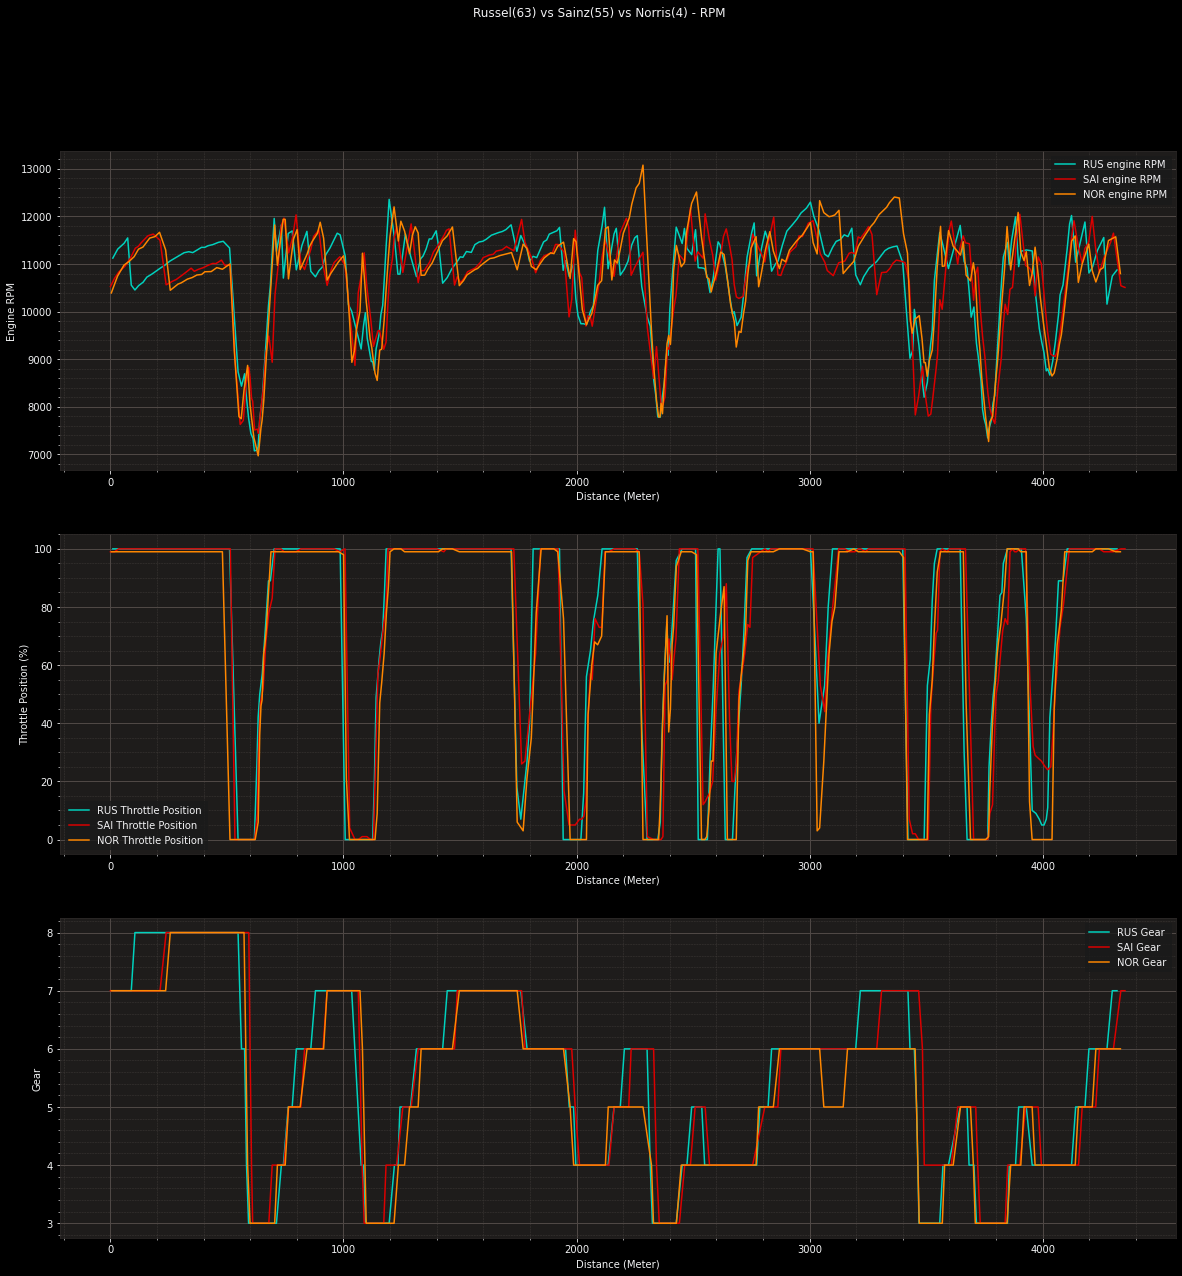

In [13]:
#plot george russel quali RPM
rus_rpm = rus_car_data['RPM']
rus_tps = rus_car_data['Throttle']
rus_distance = rus_car_data['Distance']
rus_gear = rus_car_data['nGear']

#plot carlos sainz quali RPM
sai_rpm = sai_car_data['RPM']
sai_tps = sai_car_data['Throttle']
sai_distance = sai_car_data['Distance']
sai_gear = sai_car_data['nGear']

#plot lando norris quali RPM
nor_rpm = nor_car_data['RPM']
nor_tps = nor_car_data['Throttle']
nor_distance = nor_car_data['Distance']
nor_gear = nor_car_data['nGear']

#plotting color
mer_color = fastf1.plotting.team_color('MER')
fer_color = fastf1.plotting.team_color('FER')
mcl_color = fastf1.plotting.team_color('MCL')

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(20,20), facecolor='black')
fig.suptitle('Russel(63) vs Sainz(55) vs Norris(4) - RPM')

ax1.plot(rus_distance, rus_rpm, color=mer_color , label = 'RUS engine RPM')
ax1.plot(sai_distance, sai_rpm, color=fer_color , label = 'SAI engine RPM')
ax1.plot(nor_distance, nor_rpm, color=mcl_color , label = 'NOR engine RPM')
ax1.set_xlabel('Distance (Meter)')
ax1.set_ylabel('Engine RPM')
ax1.legend()

ax2.plot(rus_distance, rus_tps, color=mer_color , label = 'RUS Throttle Position')
ax2.plot(sai_distance, sai_tps, color=fer_color , label = 'SAI Throttle Position')
ax2.plot(nor_distance, nor_tps, color=mcl_color , label = 'NOR Throttle Position')
ax2.set_xlabel('Distance (Meter)')
ax2.set_ylabel('Throttle Position (%)')
ax2.legend()

ax3.plot(rus_distance, rus_gear, color=mer_color , label = 'RUS Gear')
ax3.plot(sai_distance, sai_gear, color=fer_color , label = 'SAI Gear')
ax3.plot(nor_distance, nor_gear, color=mcl_color , label = 'NOR Gear')
ax3.set_xlabel('Distance (Meter)')
ax3.set_ylabel('Gear')
ax3.legend()

plt.show()

In [14]:
# need pole sitter X and Y for circuit plotting

rus_pos_data = rus.get_pos_data()
rus_pos_data

,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2022-07-30 14:59:16.033,OnTrack,-1606,-14,2388,pos,0 days 00:00:00.210000,0 days 01:13:50.293000
1,2022-07-30 14:59:16.113,OnTrack,-1652,23,2388,pos,0 days 00:00:00.290000,0 days 01:13:50.373000
2,2022-07-30 14:59:16.353,OnTrack,-1792,137,2388,pos,0 days 00:00:00.530000,0 days 01:13:50.613000
3,2022-07-30 14:59:16.613,OnTrack,-1945,263,2388,pos,0 days 00:00:00.790000,0 days 01:13:50.873000
4,2022-07-30 14:59:16.853,OnTrack,-2147,429,2388,pos,0 days 00:00:01.030000,0 days 01:13:51.113000
...,...,...,...,...,...,...,...,...
287,2022-07-30 15:00:32.033,OnTrack,-866,-650,2389,pos,0 days 00:01:16.210000,0 days 01:15:06.293000
288,2022-07-30 15:00:32.273,OnTrack,-1059,-476,2388,pos,0 days 00:01:16.450000,0 days 01:15:06.533000
289,2022-07-30 15:00:32.553,OnTrack,-1119,-423,2388,pos,0 days 00:01:16.730000,0 days 01:15:06.813000
290,2022-07-30 15:00:32.893,OnTrack,-1363,-213,2388,pos,0 days 00:01:17.070000,0 days 01:15:07.153000


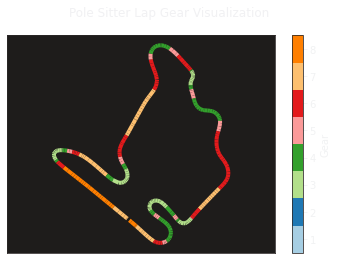

In [18]:
# need pole sitter gear and position as reference for circuit plotting

# prepare the position
x = np.array(rus_pos_data['X'].values)
y = np.array(rus_pos_data['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = rus_car_data['nGear'].to_numpy().astype(float)

# create a line collection
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

# plotting
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle('Pole Sitter Lap Gear Visualization')

cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))

plt.show()